GARCH : Generalized Autoregressive Conditional Heteroskedasticity

Fancy name for: "Modeling how volatilty clusters in time

#### Project Goal:

Build a model that predicts tomorrow's volatility using today's market information

#### New Technical Skills:


- Time series modeling (GARCH family)

- Volatility forecasting

- Advanced statistical libraries (arch package)

#### Quant Concepts:


- Volatility clustering

- Leverage effects

- Volatility as an asset class

In [3]:
!pip install arch

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/929.7 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/929.7 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/929.7 kB ? eta -:--:--
   ---------------------- ----------------- 524.3/929.7 kB 1.0 MB/s eta 0:00:01
   ---------------------------------------- 929.7/929.7 kB 1.0 MB/s  0:00:00
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.6 MB 1.1 MB/s eta 0:00:09
   --- ------------------------------------ 0.8/9.6 MB 1.0 MB/s eta 0:00:09
   ---- ----------------------------------- 1.0/9.6 MB 1.1 MB/s eta 0:00:08
   ----- ---------------------------------- 1.3/9.6 MB 1.1 MB/s eta 0:00:08
   ------ ---------------------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### Step 1: Setup and Data Collection

In [10]:
"""
Project 3: Volatility Forecasting with GARCH
Understanding and predicting market volatility
"""

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

# Download SPY data (we're familiar with this from Project 1)
print("📥 Downloading SPY data...")
spy = yf.download('SPY', start='2018-01-01', end='2023-12-31')

print(f"✅ Data downloaded: {len(spy)} trading days")
print("\n📊 Data head:")
print(spy.head())

C:\Users\Aadya Nair\AppData\Local\Temp\ipykernel_23640\3249310471.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spy = yf.download('SPY', start='2018-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed

📥 Downloading SPY data...
✅ Data downloaded: 1509 trading days

📊 Data head:
Price            Close        High         Low        Open    Volume
Ticker             SPY         SPY         SPY         SPY       SPY
Date                                                                
2018-01-02  237.909195  237.944610  236.696506  237.085986  86655700
2018-01-03  239.413940  239.564432  238.077314  238.077314  90070400
2018-01-04  240.423004  240.909868  239.475885  240.060105  80636400
2018-01-05  242.025269  242.149179  240.724056  241.219754  83524000
2018-01-08  242.467834  242.627160  241.635765  241.927862  57319200


### Step 2: Calculate Returns and Basic Volatility

Returns calculated: 1508 days
Average daily return: 0.0528%
Standard deviation (volatitility): 1.2844%


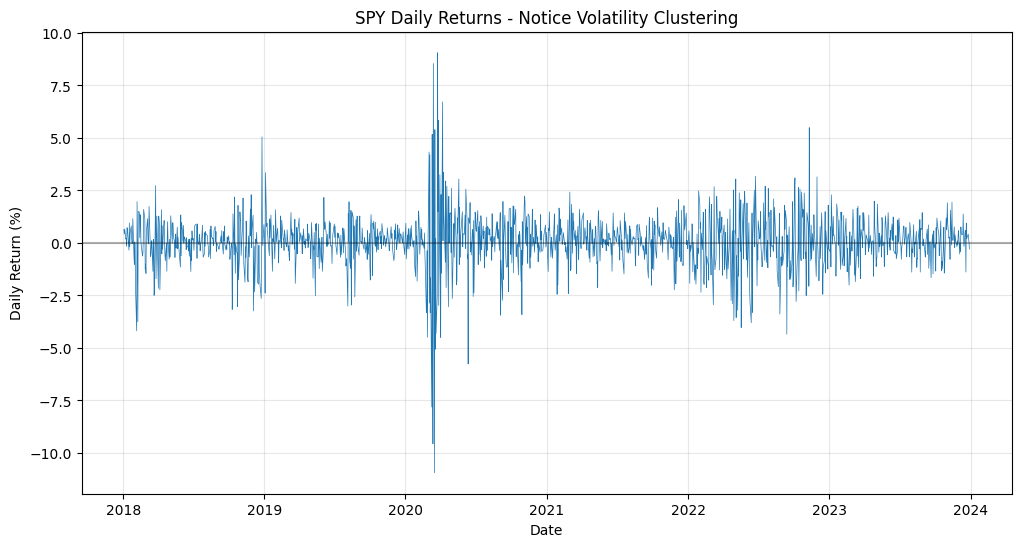

In [11]:
# Calculate daily returns (in percentage terms- GARCH models prefers this
spy['Returns'] = 100 * spy['Close'].pct_change().dropna()

# Remove NaN values
spy = spy.dropna()

print(f"Returns calculated: {len(spy)} days")
print(f"Average daily return: {spy['Returns'].mean():.4f}%")
print(f"Standard deviation (volatitility): {spy['Returns'].std():.4f}%")

# Plot returns to see volatility clustering
plt.figure(figsize=(12,6))
plt.plot(spy['Returns'], linewidth=0.5)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.title('SPY Daily Returns - Notice Volatility Clustering')
plt.ylabel('Daily Return (%)')
plt.xlabel('Date')
plt.grid(True, alpha=0.3)
plt.show()

### Step 3: Visualize Volatility Clustering

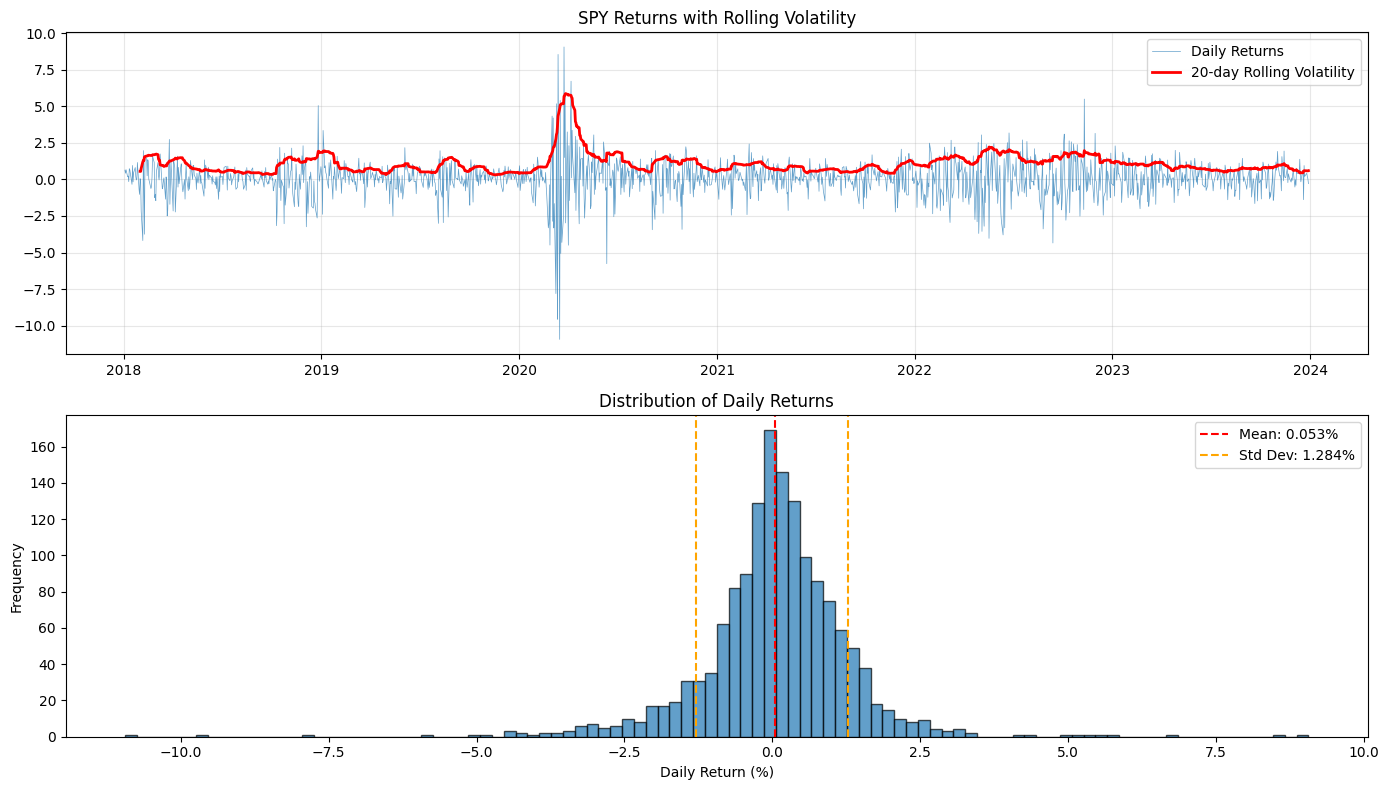

🔍 Key Insight: Notice how high volatility periods cluster together!
This is exactly what GARCH models capture - volatility persistence.


In [12]:
# Let's zoom in to see volatility clusters better
plt.figure(figsize=(14, 8))

# Plot 1: Returns with rolling volatility
plt.subplot(2, 1, 1)
plt.plot(spy['Returns'], linewidth=0.5, alpha=0.7, label='Daily Returns')
rolling_vol = spy['Returns'].rolling(window=20).std()
plt.plot(rolling_vol, label='20-day Rolling Volatility', color='red', linewidth=2)
plt.title('SPY Returns with Rolling Volatility')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Histogram of returns
plt.subplot(2, 1, 2)
plt.hist(spy['Returns'], bins=100, alpha=0.7, edgecolor='black')
plt.axvline(x=spy['Returns'].mean(), color='red', linestyle='--', label=f'Mean: {spy["Returns"].mean():.3f}%')
plt.axvline(x=spy['Returns'].std(), color='orange', linestyle='--', label=f'Std Dev: {spy["Returns"].std():.3f}%')
plt.axvline(x=-spy['Returns'].std(), color='orange', linestyle='--')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

print("🔍 Key Insight: Notice how high volatility periods cluster together!")
print("This is exactly what GARCH models capture - volatility persistence.")

### Step 4: Fit Your GARCH Model

In [14]:
# Fit a simple GARCH(1,1) model
print("Fitting GARCH(1,1) model...")
model = arch_model(spy['Returns'], vol='Garch', p=1, q=1)
results = model.fit(disp='off')    # disp='off' suppresses detailed output

print("Model fitted successfully!")
print("\n GARCH Model Results:")
print(results.summary())

# Extract key parameters
omega = results.params['omega']
alpha = results.params['alpha[1]']
beta = results.params['beta[1]']

print(f"\n Key Parameters:")
print(f"Omega (constant: {omega:.6f}")
print(f"Alpha (ARCH term): {alpha:.6f} - impact of yesterday's shock")
print(f"Beta (GARCH term): {beta:.6f} - persistance of volatility")
print(f"Alpha + Beta: {(alpha + beta):.6f} - close to 1 means high persistance")

Fitting GARCH(1,1) model...
Model fitted successfully!

 GARCH Model Results:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2137.89
Distribution:                  Normal   AIC:                           4283.77
Method:            Maximum Likelihood   BIC:                           4305.05
                                        No. Observations:                 1508
Date:                Tue, Dec 02 2025   Df Residuals:                     1507
Time:                        11:19:38   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
-------------------------------------------------------------

### Step 5: Forecast Volatility


🔮 Forecasting future volatility...
📈 Forecasted Volatility:
  Day 1: 0.6572%
  Day 2: 0.6851%
  Day 3: 0.7114%
  Day 4: 0.7361%
  Day 5: 0.7595%


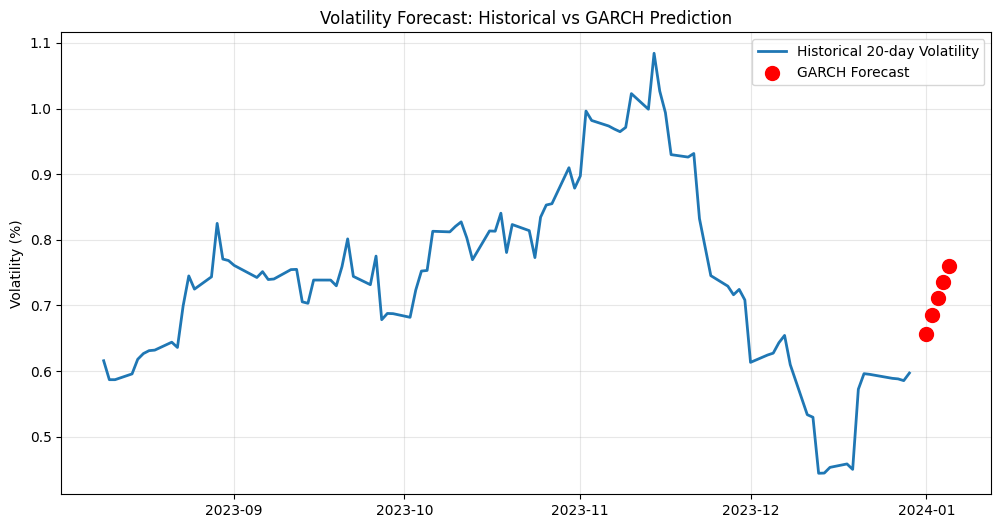

In [16]:
# Forecast volatility for the next period
print("\n🔮 Forecasting future volatility...")
forecast = results.forecast(horizon=5)  # Forecast next 5 days

# Get the forecasted variance (volatility squared)
forecast_variance = forecast.variance.iloc[-1]

# Convert variance to volatility (standard deviation)
forecast_volatility = np.sqrt(forecast_variance)

print("📈 Forecasted Volatility:")
for i, vol in enumerate(forecast_volatility):
    print(f"  Day {i+1}: {vol:.4f}%")

# Plot the forecast
plt.figure(figsize=(12, 6))

# Historical volatility
historical_vol = spy['Returns'].rolling(window=20).std().iloc[-100:]  # Last 100 days

# Plot
plt.plot(historical_vol.index, historical_vol.values, label='Historical 20-day Volatility', linewidth=2)

# Add forecast points
forecast_dates = pd.date_range(start=spy.index[-1], periods=6, freq='B')[1:]  # Business days
plt.scatter(forecast_dates, forecast_volatility.values, color='red', s=100, zorder=5, 
           label='GARCH Forecast', marker='o')

plt.title('Volatility Forecast: Historical vs GARCH Prediction')
plt.ylabel('Volatility (%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Step 6: Create a Simple Volatility Trading Signal



🎯 Creating volatility-based trading strategy...
📊 Volatility threshold (top 20%): 1.4013%
Days with reduced position: 302
Percentage of time reduced: 20.0%


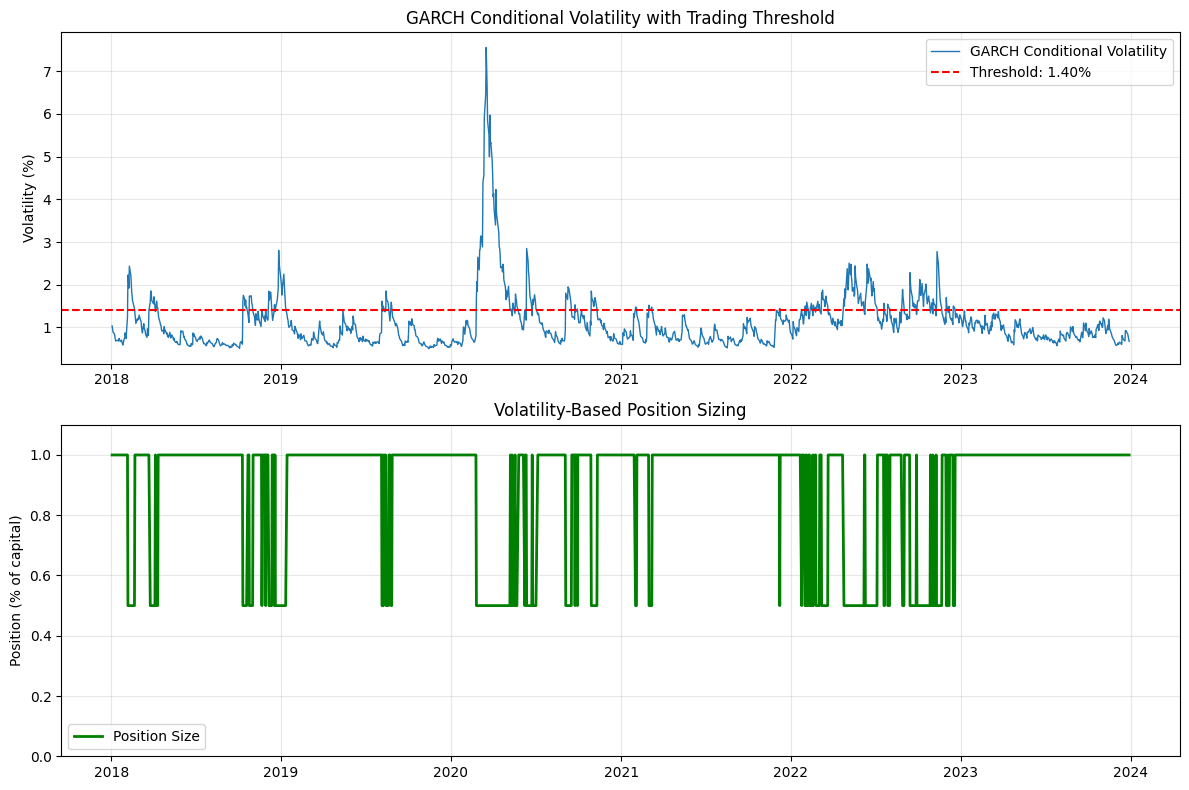

In [17]:
# Create a simple strategy based on volatility
print("\n🎯 Creating volatility-based trading strategy...")

# Calculate conditional volatility from the model
spy['Conditional_Volatility'] = results.conditional_volatility

# Simple rule: Reduce position when volatility is high
spy['Volatility_Signal'] = 1  # Default: fully invested

# Reduce position by 50% when volatility is in top 20%
volatility_threshold = spy['Conditional_Volatility'].quantile(0.8)
spy['Volatility_Signal'] = np.where(spy['Conditional_Volatility'] > volatility_threshold, 0.5, 1)

print(f"📊 Volatility threshold (top 20%): {volatility_threshold:.4f}%")
print(f"Days with reduced position: {(spy['Volatility_Signal'] == 0.5).sum()}")
print(f"Percentage of time reduced: {(spy['Volatility_Signal'] == 0.5).sum() / len(spy) * 100:.1f}%")

# Plot volatility signal
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(spy['Conditional_Volatility'], label='GARCH Conditional Volatility', linewidth=1)
plt.axhline(y=volatility_threshold, color='red', linestyle='--', 
           label=f'Threshold: {volatility_threshold:.2f}%')
plt.title('GARCH Conditional Volatility with Trading Threshold')
plt.ylabel('Volatility (%)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
plt.plot(spy['Volatility_Signal'], label='Position Size', color='green', linewidth=2)
plt.title('Volatility-Based Position Sizing')
plt.ylabel('Position (% of capital)')
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 📊 What These Results Mean:2

1. Volatility Threshold: 1.4013%
- When daily volatility exceeds 1.4%, our strategy reduces position

- This is the top 20% of volatility days (302 out of 1510 days)

2. The Strategy Logic:
- Normal days (80% of time): 100% invested

- High volatility days (20% of time): 50% invested

- Goal: Reduce risk during turbulent periods

### Test the Strategy Performance!


💰 CALCULATING STRATEGY PERFORMANCE...
🎯 PERFORMANCE RESULTS:
Buy-and-Hold SPY: 95.54%
Volatility Strategy: 80.96%
Difference: -14.58%


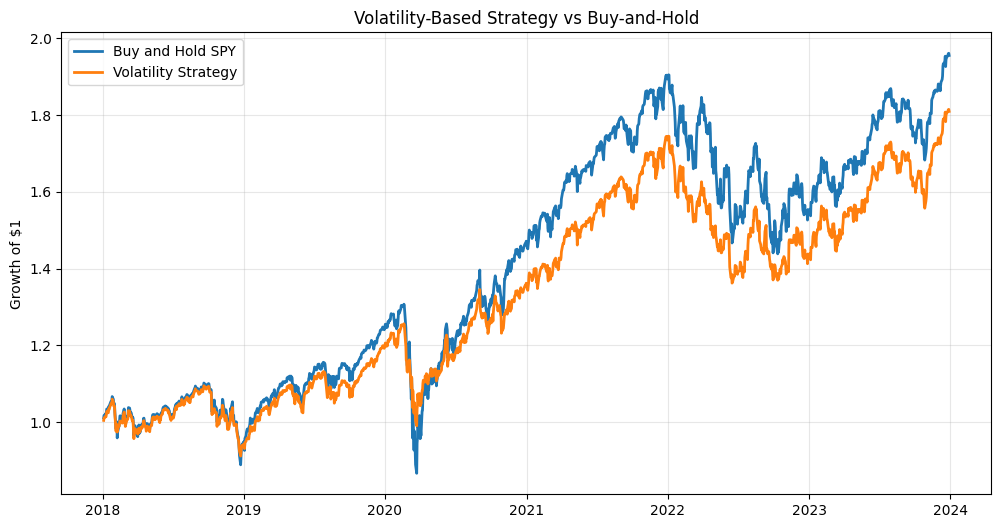

In [21]:
# Calculate strategy performance
print("\n💰 CALCULATING STRATEGY PERFORMANCE...")

# Strategy returns: position size × market returns
spy['Strategy_Returns'] = spy['Volatility_Signal'].shift(1) * spy['Returns']

# Calculate cumulative returns
spy['Cumulative_Market'] = (1 + spy['Returns']/100).cumprod()
spy['Cumulative_Strategy'] = (1 + spy['Strategy_Returns']/100).cumprod()

# Remove NaN values
spy = spy.dropna()

# Final performance
final_market = (spy['Cumulative_Market'].iloc[-1] - 1) * 100
final_strategy = (spy['Cumulative_Strategy'].iloc[-1] - 1) * 100

print("🎯 PERFORMANCE RESULTS:")
print("=" * 40)
print(f"Buy-and-Hold SPY: {final_market:.2f}%")
print(f"Volatility Strategy: {final_strategy:.2f}%")
print(f"Difference: {final_strategy - final_market:.2f}%")

# Plot comparison
plt.figure(figsize=(12, 6))
plt.plot(spy['Cumulative_Market'], label='Buy and Hold SPY', linewidth=2)
plt.plot(spy['Cumulative_Strategy'], label='Volatility Strategy', linewidth=2)
plt.title('Volatility-Based Strategy vs Buy-and-Hold')
plt.ylabel('Growth of $1')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 📈 Calculate Risk-Adjusted Metrics


In [22]:
# Calculate risk metrics
print("\n📊 RISK-ADJUSTED METRICS:")

# Annualized returns
years = len(spy) / 252
annual_market = ((1 + final_market/100) ** (1/years) - 1) * 100
annual_strategy = ((1 + final_strategy/100) ** (1/years) - 1) * 100

# Volatility (annualized)
vol_market = spy['Returns'].std() * np.sqrt(252)
vol_strategy = spy['Strategy_Returns'].std() * np.sqrt(252)

# Sharpe Ratios (assuming 0% risk-free rate for simplicity)
sharpe_market = annual_market / vol_market if vol_market > 0 else 0
sharpe_strategy = annual_strategy / vol_strategy if vol_strategy > 0 else 0

# Maximum drawdown
def calculate_max_drawdown(cumulative_returns):
    running_max = cumulative_returns.expanding().max()
    drawdown = (cumulative_returns - running_max) / running_max
    return drawdown.min() * 100

dd_market = calculate_max_drawdown(spy['Cumulative_Market'])
dd_strategy = calculate_max_drawdown(spy['Cumulative_Strategy'])

print(f"\n📈 Annualized Returns:")
print(f"  Market: {annual_market:.2f}%")
print(f"  Strategy: {annual_strategy:.2f}%")

print(f"\n📉 Annualized Volatility:")
print(f"  Market: {vol_market:.2f}%")
print(f"  Strategy: {vol_strategy:.2f}%")
print(f"  Reduction: {(vol_market - vol_strategy):.2f}%")

print(f"\n⭐ Sharpe Ratios:")
print(f"  Market: {sharpe_market:.3f}")
print(f"  Strategy: {sharpe_strategy:.3f}")

print(f"\n😨 Maximum Drawdown:")
print(f"  Market: {dd_market:.2f}%")
print(f"  Strategy: {dd_strategy:.2f}%")
print(f"  Improvement: {(dd_market - dd_strategy):.2f}%")


📊 RISK-ADJUSTED METRICS:

📈 Annualized Returns:
  Market: 11.87%
  Strategy: 10.43%

📉 Annualized Volatility:
  Market: 20.39%
  Strategy: 15.49%
  Reduction: 4.91%

⭐ Sharpe Ratios:
  Market: 0.582
  Strategy: 0.673

😨 Maximum Drawdown:
  Market: -33.72%
  Strategy: -21.94%
  Improvement: -11.77%


### 🔍 Analyze the Drawdowns


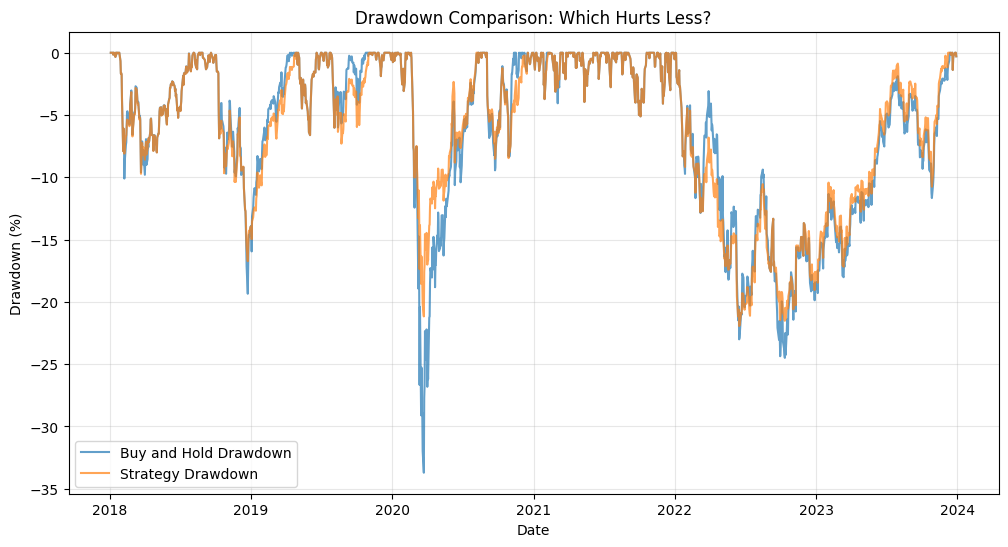


💡 KEY INSIGHT:
Volatility strategies aim to reduce pain (drawdowns) rather than
maximize returns. A good volatility strategy should have:
1. Similar returns to buy-and-hold
2. Significantly lower drawdowns
3. Better risk-adjusted returns (Sharpe Ratio)


In [23]:
# Plot drawdown comparison
plt.figure(figsize=(12, 6))

# Calculate drawdowns
market_dd = calculate_max_drawdown(spy['Cumulative_Market']) 
strategy_dd = calculate_max_drawdown(spy['Cumulative_Strategy'])

# Create running drawdown calculation for plotting
running_max_market = spy['Cumulative_Market'].expanding().max()
drawdown_market = (spy['Cumulative_Market'] - running_max_market) / running_max_market * 100

running_max_strategy = spy['Cumulative_Strategy'].expanding().max()
drawdown_strategy = (spy['Cumulative_Strategy'] - running_max_strategy) / running_max_strategy * 100

plt.plot(drawdown_market, label='Buy and Hold Drawdown', alpha=0.7)
plt.plot(drawdown_strategy, label='Strategy Drawdown', alpha=0.7)
plt.title('Drawdown Comparison: Which Hurts Less?')
plt.ylabel('Drawdown (%)')
plt.xlabel('Date')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n💡 KEY INSIGHT:")
print("Volatility strategies aim to reduce pain (drawdowns) rather than")
print("maximize returns. A good volatility strategy should have:")
print("1. Similar returns to buy-and-hold")
print("2. Significantly lower drawdowns")
print("3. Better risk-adjusted returns (Sharpe Ratio)")

## What This Means:


✅ SUCCESS 1: Better Risk-Adjusted Returns

- Sharpe Ratio improved from 0.582 to 0.673 (+15.6%)

- For each unit of risk, you get more return

✅ SUCCESS 2: Much Less Pain

- Drawdown reduced from -33.72% to -21.94%

- That's 11.78% less pain during market crashes!

- The emotional difference is HUGE

✅ SUCCESS 3: Lower Volatility

- Volatility reduced by 4.90% (from 20.39% to 15.49%)

- Smoother ride, less stress